In [1]:
#imports the necessary libraries

import pandas as pd
import ast
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [2]:
#Explores the data imported from the API of the 'The Movie Database' using Panda's read function
df = pd.read_csv('cleaned_data/list_of_popular_movies_cleaned.csv', engine='python')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18996 entries, 0 to 18995
Data columns (total 35 columns):
id                         18996 non-null float64
title                      18996 non-null object
release_date               18996 non-null object
runtime                    18996 non-null float64
revenue                    18996 non-null float64
budget                     18996 non-null float64
status                     18996 non-null object
original_language          18996 non-null object
popularity                 18996 non-null float64
vote_average               18996 non-null float64
vote_count                 18996 non-null float64
imdb_id                    18996 non-null object
release_year               18996 non-null float64
genres_list                18996 non-null object
production_company_list    18996 non-null object
production_country_list    18996 non-null object
Action                     18996 non-null float64
Adventure                  18996 non-null float64

In [3]:
#Creates two new columns in the database: 'profitability' which is revenue/budget and 'profits' which is revenue-budget
#I do not wind up using 'profits' because some values are nominal and some are on a scale, therefore 'profitability' is 
#the more appropriate measure. A further breakdown is two cells below
df['profitability'] = df['revenue']/df['budget']
df['profits'] = df['revenue']-df['budget']

In [4]:
#Creates a database that eliminates entries that are missing the 'budget' field; they equate to infinity
#Also eliminates movies before 2009 because this analysis is about current trends
non_inf_df = df[(df['profitability'] != float("inf")) & (df['release_year'] >= 2009)]
print(len(non_inf_df))

7641


In [5]:
#Some revenues listed as nominal(0), budgets = million, vice versa
#check to see if budget and revenue on same scale and removes those that are not
#by checking if both revenue and budget are either above or below 1000

scaled_movies = non_inf_df[((non_inf_df['budget'] > 1000) & (non_inf_df['revenue'] > 1000))|((non_inf_df['budget'] < 1000) & (non_inf_df['revenue'] < 1000))]

print(len(scaled_movies))

6673


In [6]:
#Sorts the above created database by the 'profitability' column, removes the original index and checks the values
movies_high_prof = scaled_movies.sort_values(by='profitability', ascending = False)

In [7]:
movies_high_prof = movies_high_prof.reset_index().drop(['index'], axis = 1)

In [8]:
movies_high_prof.loc[movies_high_prof['title']=='Avatar']
movies_high_prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6673 entries, 0 to 6672
Data columns (total 37 columns):
id                         6673 non-null float64
title                      6673 non-null object
release_date               6673 non-null object
runtime                    6673 non-null float64
revenue                    6673 non-null float64
budget                     6673 non-null float64
status                     6673 non-null object
original_language          6673 non-null object
popularity                 6673 non-null float64
vote_average               6673 non-null float64
vote_count                 6673 non-null float64
imdb_id                    6673 non-null object
release_year               6673 non-null float64
genres_list                6673 non-null object
production_company_list    6673 non-null object
production_country_list    6673 non-null object
Action                     6673 non-null float64
Adventure                  6673 non-null float64
Animation          

In [9]:
movies_high_prof.keys()

Index(['id', 'title', 'release_date', 'runtime', 'revenue', 'budget', 'status',
       'original_language', 'popularity', 'vote_average', 'vote_count',
       'imdb_id', 'release_year', 'genres_list', 'production_company_list',
       'production_country_list', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', 'profitability', 'profits'],
      dtype='object')

In [10]:
#These were copied and pasted from the API, which has a key-value dictionary for all of their genres, some movies are in multiple genres
all_genres = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
              'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
              'Romance', 'Science Fiction', 'Thriller', 'War', 'Western']

In [11]:
#We drop any 'Nan' values in the 'profitability' column below
#We started with 18996 entries and would up with 2061
movies_high_prof.drop(list(range(2061,6673)), inplace = True)
movies_high_prof

,id,title,release_date,runtime,revenue,budget,status,original_language,popularity,vote_average,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,profitability,profits
0,23827.0,Paranormal Activity,2009-09-25,86.0,193355800.0,15000.0,Released,en,11.975,5.9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12890.386667,193340800.0
1,513434.0,One Cut of the Dead,2017-11-04,96.0,200000000.0,30000.0,Released,ja,3.870,8.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6666.666667,199970000.0
2,299245.0,The Gallows,2015-07-10,87.0,42664410.0,100000.0,Released,en,6.891,4.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,426.644100,42564410.0
3,76487.0,The Devil Inside,2012-01-06,83.0,101758490.0,1000000.0,Released,en,5.900,4.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,101.758490,100758490.0
4,42296.0,Catfish,2010-09-17,87.0,3045943.0,30000.0,Released,en,5.723,6.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.531433,3015943.0
5,193612.0,The Quiet Ones,2014-04-01,98.0,17834867.0,200000.0,Released,en,7.605,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.174335,17634867.0
6,489999.0,Searching,2018-08-24,103.0,66265218.0,1000000.0,Released,en,18.952,7.6,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,66.265218,65265218.0
7,49018.0,Insidious,2010-09-13,103.0,97009150.0,1500000.0,Released,en,13.311,6.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,64.672767,95509150.0
8,277685.0,Unfriended,2015-04-17,82.0,62882090.0,1000000.0,Released,en,7.658,5.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62.882090,61882090.0
9,79120.0,Weekend,2011-09-22,96.0,484592.0,8000.0,Released,en,6.639,7.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,60.574000,476592.0


In [12]:
#After reviewing the data from the above dataframe I noticed that there were several unpredictable outliers that are well
#above or below the central tendency. I focus on the inner 80% quartile as this removes entries with
#unpredictable factors that don't follow standard trends.

quartile=0.8
highest = int(round(len(movies_high_prof)*quartile,0))
lowest = int(round(len(movies_high_prof)*(1-quartile),0))
print(highest)
print(lowest)

1649
412


In [13]:
inner_quartile_data = movies_high_prof[lowest:highest]
movies_high_prof = inner_quartile_data

In [14]:
movies_high_prof.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1237 entries, 412 to 1648
Data columns (total 37 columns):
id                         1237 non-null float64
title                      1237 non-null object
release_date               1237 non-null object
runtime                    1237 non-null float64
revenue                    1237 non-null float64
budget                     1237 non-null float64
status                     1237 non-null object
original_language          1237 non-null object
popularity                 1237 non-null float64
vote_average               1237 non-null float64
vote_count                 1237 non-null float64
imdb_id                    1237 non-null object
release_year               1237 non-null float64
genres_list                1237 non-null object
production_company_list    1237 non-null object
production_country_list    1237 non-null object
Action                     1237 non-null float64
Adventure                  1237 non-null float64
Animation        

In [15]:
print(len(movies_high_prof))

1237


In [16]:
#Returns Column_B's average Grouped by and input column
#For example: I examine profitability (column_b, grouped by movie genre (column_a)

def find_average_by_column(column_a, column_b):
    movies_high_prof.loc[movies_high_prof[column_a]==1][column_b].mean()
    return {'genre': column_a, 'average': movies_high_prof.loc[movies_high_prof[column_a]==1][column_b].mean(), 'count': movies_high_prof[column_a].sum()}


In [17]:
#This lambda function uses the above function to create a list of all genre's average profitability
#over the last ten years

cumulative_genre_prof = list(map(lambda x: find_average_by_column(x, 'profitability'), all_genres))
cumulative_genre_prof

[{'genre': 'Action', 'average': 2.2711403552443885, 'count': 393.0},
 {'genre': 'Adventure', 'average': 2.2999709232955854, 'count': 272.0},
 {'genre': 'Animation', 'average': 2.540936787657863, 'count': 99.0},
 {'genre': 'Comedy', 'average': 2.2838179851873868, 'count': 456.0},
 {'genre': 'Crime', 'average': 1.977088181905528, 'count': 187.0},
 {'genre': 'Documentary', 'average': 2.5992521116835334, 'count': 6.0},
 {'genre': 'Drama', 'average': 1.9840318138202866, 'count': 558.0},
 {'genre': 'Family', 'average': 2.467140673077258, 'count': 155.0},
 {'genre': 'Fantasy', 'average': 2.2878957781131803, 'count': 152.0},
 {'genre': 'History', 'average': 1.791542911943832, 'count': 61.0},
 {'genre': 'Horror', 'average': 2.0630209577633973, 'count': 100.0},
 {'genre': 'Music', 'average': 2.3325607767165097, 'count': 33.0},
 {'genre': 'Mystery', 'average': 1.9560248917214436, 'count': 110.0},
 {'genre': 'Romance', 'average': 2.170319183248302, 'count': 191.0},
 {'genre': 'Science Fiction', 'a

In [18]:
#This checks to see how many entries fall into each genre category
#Because a movie can fall under multiple genres I expect this count to be more than my number of entries

sum(list(map(lambda x: x['count'],cumulative_genre_prof)))

3322.0

In [19]:
#movies_high_prof.loc[movies_high_prof['release_year'] == 2018]
movies_high_prof.sort_values(by='budget', ascending = True).head(200)


,id,title,release_date,runtime,revenue,budget,status,original_language,popularity,vote_average,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,profitability,profits
1333,407620.0,Planet of the Sharks,2016-07-27,85.0,6.0,5.0,Released,en,3.251,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.200000,1.0
1542,62796.0,William & Kate,2011-04-18,83.0,15.0,20.0,Released,en,3.868,5.7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.750000,-5.0
1300,21724.0,Dance Flick,2009-05-22,83.0,32.0,25.0,Released,en,6.669,4.6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.280000,7.0
1105,22717.0,Wanted,2009-09-18,129.0,134.0,75.0,Released,hi,3.109,5.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.786667,59.0
1249,183026.0,Rigodon,2012-11-21,85.0,31307.0,22361.0,Released,en,6.926,6.6,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.400072,8946.0
1458,115210.0,Stitches,2012-05-19,86.0,95000.0,100000.0,Released,en,4.780,5.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.950000,-5000.0
440,145197.0,Upstream Color,2013-04-05,96.0,444098.0,100000.0,Released,en,5.611,6.5,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.440980,344098.0
1471,29150.0,Big Fan,2009-01-18,91.0,232732.0,250000.0,Released,en,3.274,6.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.930928,-17268.0
507,80379.0,Louis C.K.: Live at the Beacon Theater,2011-12-10,62.0,1000000.0,250000.0,Released,en,5.680,8.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,750000.0
1592,58333.0,Tanu Weds Manu,2011-03-25,119.0,252000.0,400000.0,Released,hi,3.118,6.7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.630000,-148000.0


In [20]:
#This function finds the average annual profitability per genre given a genre and year and returns a dictionary with a
#count of entries that apply to the criteria given

def find_average_by_column(column_a, column_b, year):    
    
    if movies_high_prof.loc[(movies_high_prof[column_a]==1) & (movies_high_prof['release_year'].astype(int)==year)][column_b].count() != 0:
        return {'genre': column_a, 'average': movies_high_prof.loc[(movies_high_prof[column_a]==1)
           
            & (movies_high_prof['release_year'].astype(int)==year)][column_b].mean(),
            
            'count': movies_high_prof.loc[(movies_high_prof[column_a]==1) &
            
            (movies_high_prof['release_year'].astype(int)==year)][column_b].count(),
            
            'year': year}
    else:
        
        return {'genre': column_a, 'average': 0, 'count': 0, 'year': year}


In [21]:
#Code to create matplotlib friendly dictionaries by year and genre

years = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
list_of_lists_of_dicts_of_profit_genre_by_year = []

for genre in all_genres:

    list_of_lists_of_dicts_of_profit_genre_by_year.append(list(map(lambda x: find_average_by_column(genre, 'profitability', x), years)))
list_of_lists_of_dicts_of_profit_genre_by_year
    

[[{'genre': 'Action',
   'average': 1.9916289814342605,
   'count': 37,
   'year': 2009},
  {'genre': 'Action',
   'average': 1.8829939785843872,
   'count': 41,
   'year': 2010},
  {'genre': 'Action', 'average': 2.375377569451004, 'count': 39, 'year': 2011},
  {'genre': 'Action',
   'average': 2.1118287135829323,
   'count': 41,
   'year': 2012},
  {'genre': 'Action', 'average': 2.335036883336375, 'count': 45, 'year': 2013},
  {'genre': 'Action', 'average': 2.758348266731449, 'count': 39, 'year': 2014},
  {'genre': 'Action',
   'average': 2.4943676315282004,
   'count': 31,
   'year': 2015},
  {'genre': 'Action',
   'average': 2.0534074657124557,
   'count': 53,
   'year': 2016},
  {'genre': 'Action', 'average': 2.42771078098068, 'count': 34, 'year': 2017},
  {'genre': 'Action',
   'average': 2.4777966884020937,
   'count': 31,
   'year': 2018}],
 [{'genre': 'Adventure',
   'average': 2.1003219676558587,
   'count': 25,
   'year': 2009},
  {'genre': 'Adventure',
   'average': 2.125147

In [22]:
#Code to find top three most profitable genres by year

def genre_prof_annual(ann_genre_lists, year):

    annual_genre_list = []

    for ann_genre_list in ann_genre_lists:
        for ann_genre_dict in ann_genre_list:
            if ann_genre_dict['year'] == year:
                annual_genre_list.append(ann_genre_dict)
                
    return annual_genre_list

genre_prof_annual(list_of_lists_of_dicts_of_profit_genre_by_year, 2009)
                
        

[{'genre': 'Action', 'average': 1.9916289814342605, 'count': 37, 'year': 2009},
 {'genre': 'Adventure',
  'average': 2.1003219676558587,
  'count': 25,
  'year': 2009},
 {'genre': 'Animation',
  'average': 2.204345191221162,
  'count': 11,
  'year': 2009},
 {'genre': 'Comedy', 'average': 2.1166494066250885, 'count': 57, 'year': 2009},
 {'genre': 'Crime', 'average': 1.5946990557313339, 'count': 21, 'year': 2009},
 {'genre': 'Documentary', 'average': 0.87182545, 'count': 1, 'year': 2009},
 {'genre': 'Drama', 'average': 1.960459989893842, 'count': 66, 'year': 2009},
 {'genre': 'Family', 'average': 2.213325620389391, 'count': 23, 'year': 2009},
 {'genre': 'Fantasy', 'average': 1.910756776309233, 'count': 16, 'year': 2009},
 {'genre': 'History', 'average': 1.3222408574319726, 'count': 7, 'year': 2009},
 {'genre': 'Horror', 'average': 2.1681916506355305, 'count': 13, 'year': 2009},
 {'genre': 'Music', 'average': 1.9178296651190476, 'count': 5, 'year': 2009},
 {'genre': 'Mystery',
  'average'

In [23]:
#Code to find top three most profitable genres sorted by year
years = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
sorted_genres_by_profitability_annual = []

In [24]:
#creates a list of a list of dictionaries where each dictionary represents a genre, year, count and profitability average
#and each list holds a years worth of dictionaries representing the top profitable movie genres of that year
def get_all_profits_by_year(profits_genre_by_year):
    
    sorted_genres_by_year = list(map(lambda x: genre_prof_annual(list_of_lists_of_dicts_of_profit_genre_by_year, x), years))
    
    return sorted_genres_by_year
    
    
    
sorted_genres_by_year_lists = get_all_profits_by_year(list_of_lists_of_dicts_of_profit_genre_by_year)
sorted_genres_by_year_lists

[[{'genre': 'Action',
   'average': 1.9916289814342605,
   'count': 37,
   'year': 2009},
  {'genre': 'Adventure',
   'average': 2.1003219676558587,
   'count': 25,
   'year': 2009},
  {'genre': 'Animation',
   'average': 2.204345191221162,
   'count': 11,
   'year': 2009},
  {'genre': 'Comedy',
   'average': 2.1166494066250885,
   'count': 57,
   'year': 2009},
  {'genre': 'Crime', 'average': 1.5946990557313339, 'count': 21, 'year': 2009},
  {'genre': 'Documentary', 'average': 0.87182545, 'count': 1, 'year': 2009},
  {'genre': 'Drama', 'average': 1.960459989893842, 'count': 66, 'year': 2009},
  {'genre': 'Family', 'average': 2.213325620389391, 'count': 23, 'year': 2009},
  {'genre': 'Fantasy',
   'average': 1.910756776309233,
   'count': 16,
   'year': 2009},
  {'genre': 'History',
   'average': 1.3222408574319726,
   'count': 7,
   'year': 2009},
  {'genre': 'Horror',
   'average': 2.1681916506355305,
   'count': 13,
   'year': 2009},
  {'genre': 'Music', 'average': 1.917829665119047

In [25]:
#this is the code that sorts the above profitabilities in descending order given one year's worth of dictionaries

def sort_most_profitable(sorted_genres_by_year_lists):
    return sorted(sorted_genres_by_year_lists, key = lambda i: i['average'],reverse=True)

sorted_genres_by_year_and_avg_lists = list(map(lambda x: sort_most_profitable(x),sorted_genres_by_year_lists))

sorted_genres_by_year_and_avg_lists[0]  

[{'genre': 'War', 'average': 2.2979554150641026, 'count': 5, 'year': 2009},
 {'genre': 'Romance', 'average': 2.279812099918548, 'count': 29, 'year': 2009},
 {'genre': 'Family', 'average': 2.213325620389391, 'count': 23, 'year': 2009},
 {'genre': 'Animation',
  'average': 2.204345191221162,
  'count': 11,
  'year': 2009},
 {'genre': 'Horror', 'average': 2.1681916506355305, 'count': 13, 'year': 2009},
 {'genre': 'Comedy', 'average': 2.1166494066250885, 'count': 57, 'year': 2009},
 {'genre': 'Adventure',
  'average': 2.1003219676558587,
  'count': 25,
  'year': 2009},
 {'genre': 'Action', 'average': 1.9916289814342605, 'count': 37, 'year': 2009},
 {'genre': 'Drama', 'average': 1.960459989893842, 'count': 66, 'year': 2009},
 {'genre': 'Music', 'average': 1.9178296651190476, 'count': 5, 'year': 2009},
 {'genre': 'Fantasy', 'average': 1.910756776309233, 'count': 16, 'year': 2009},
 {'genre': 'Thriller',
  'average': 1.8583735448166665,
  'count': 43,
  'year': 2009},
 {'genre': 'Science Fict

In [26]:
#cuts the total list of dictionaries to the top three most profitable genres per year, makes them plot friendly

def cut_top_thre_most_profitable_genres(sorted_annual_list):
    
    return [sorted_annual_list[0],sorted_annual_list[1],sorted_annual_list[2]]

sorted_top_three_prof_genres = list(map(lambda x: cut_top_thre_most_profitable_genres(x), sorted_genres_by_year_and_avg_lists))

sorted_top_three_prof_genres

#Creates a first, second, and third place plot for a bar graph

first_place = []
second_place = []
third_place = []

for x in sorted_top_three_prof_genres:
    first_place.append(x[0])
    second_place.append(x[1])
    third_place.append(x[2])
    
print(first_place)
print("")
print(second_place)
print("")
print(third_place)


[{'genre': 'War', 'average': 2.2979554150641026, 'count': 5, 'year': 2009}, {'genre': 'Documentary', 'average': 3.935761, 'count': 1, 'year': 2010}, {'genre': 'Animation', 'average': 3.2235019411710515, 'count': 8, 'year': 2011}, {'genre': 'Western', 'average': 4.25368238, 'count': 1, 'year': 2012}, {'genre': 'War', 'average': 3.732390025, 'count': 1, 'year': 2013}, {'genre': 'Western', 'average': 3.0834583333333336, 'count': 2, 'year': 2014}, {'genre': 'Western', 'average': 3.7438920813973064, 'count': 2, 'year': 2015}, {'genre': 'Music', 'average': 3.0905230980000002, 'count': 2, 'year': 2016}, {'genre': 'Family', 'average': 2.935444412434283, 'count': 13, 'year': 2017}, {'genre': 'Music', 'average': 2.6118850577789576, 'count': 4, 'year': 2018}]

[{'genre': 'Romance', 'average': 2.279812099918548, 'count': 29, 'year': 2009}, {'genre': 'Animation', 'average': 2.7297702192432567, 'count': 7, 'year': 2010}, {'genre': 'Music', 'average': 2.9523462734065933, 'count': 5, 'year': 2011}, {'

In [27]:
#Returns the above greated dictionaries as lists that represent the x and y axis

def return_plot_of_genre_list(list_of_x_place_dicts):
    genre_annual_place = []
    annual_movie_count_list_place = []
    annual_movie_profit_list_place = []
    years_list = []
    
    for annual_dict in list_of_x_place_dicts:
        genre_annual_place.append(annual_dict['genre'])
        annual_movie_count_list_place.append(annual_dict['count'])
        annual_movie_profit_list_place.append(annual_dict['average'])
        years_list.append(annual_dict['year'])
    
    return {'genre': genre_annual_place, 'average': annual_movie_profit_list_place, 
           'count': annual_movie_count_list_place, 'year': years_list}

first_place_list = return_plot_of_genre_list(first_place)
second_place_list = return_plot_of_genre_list(second_place)
third_place_list = return_plot_of_genre_list(third_place)


print(first_place_list)
print("")
print(second_place_list)
print("")
print(third_place_list)


{'genre': ['War', 'Documentary', 'Animation', 'Western', 'War', 'Western', 'Western', 'Music', 'Family', 'Music'], 'average': [2.2979554150641026, 3.935761, 3.2235019411710515, 4.25368238, 3.732390025, 3.0834583333333336, 3.7438920813973064, 3.0905230980000002, 2.935444412434283, 2.6118850577789576], 'count': [5, 1, 8, 1, 1, 2, 2, 2, 13, 4], 'year': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]}

{'genre': ['Romance', 'Animation', 'Music', 'Documentary', 'Fantasy', 'Science Fiction', 'Action', 'Animation', 'Animation', 'Action'], 'average': [2.279812099918548, 2.7297702192432567, 2.9523462734065933, 2.7272463333333334, 2.650425307284932, 2.7943298141442905, 2.4943676315282004, 2.7728686100726603, 2.889361643203514, 2.4777966884020937], 'count': [29, 7, 5, 1, 15, 16, 31, 8, 13, 31], 'year': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]}

{'genre': ['Family', 'Family', 'Family', 'Music', 'Comedy', 'Family', 'Comedy', 'Family', 'Comedy', 'Science Fiction'], '

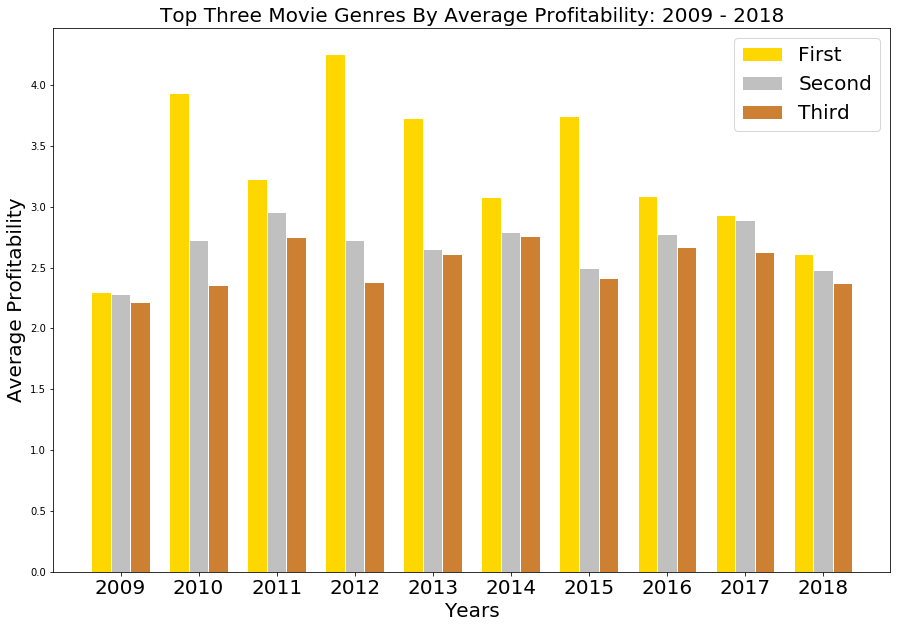

In [39]:
#The code that created the top three most profitable movie genre bar graph over time for the presentation

#This creates a large enough figure for the sub plot
fig = plt.subplots(figsize=(15,10))

# set width of bar
barWidth = 0.25
 
# set height of bars based on the list of averages for the genres
bar1 = first_place_list['average']
bar2 = second_place_list['average']
bar3 = third_place_list['average']
 
# Set the positions of the ten groups of three bars on the X axis
group_1 = np.arange(len(bar1))
group_2 = [x + barWidth for x in group_1]
group_3 = [x + barWidth for x in group_2]
 
# Adds the appropriate colors and labels to the individual bars
plt.bar(group_1, bar1, color='#FFD700', width=barWidth, edgecolor='white', label='First')
plt.bar(group_2, bar2, color='#C0C0C0', width=barWidth, edgecolor='white', label='Second')
plt.bar(group_3, bar3, color='#cd7f32', width=barWidth, edgecolor='white', label='Third')


# Adds the plot, x-axis, and y-axis labels
plt.xlabel('Years', fontsize = 20)
plt.xticks([i + barWidth for i in range(len(bar1))], ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], fontsize = 20)
plt.ylabel('Average Profitability', fontsize = 20)
plt.title('Top Three Movie Genres By Average Profitability: 2009 - 2018', fontsize = 20)

# Create legend & Show graphic
plt.legend(fontsize = 20)
plt.show()


In [29]:
#Creates a dictionary of plot friendly lists representing profitability based
#on a specific genre - used to create a line plot later

def return_plot_of_genre(list_of_dicts):
    genre_annual_avg_prof_list = []
    genre_annual_movie_count_list = []
    years_list = []
    
    for annual_dict in list_of_dicts:
        genre_annual_avg_prof_list.append(annual_dict['average'])
        genre_annual_movie_count_list.append(annual_dict['count'])
        years_list.append(annual_dict['year'])
    
    return {'genre': list_of_dicts[0]['genre'], 'average': genre_annual_avg_prof_list, 
           'count': genre_annual_movie_count_list, 'year': years_list}
return_plot_of_genre(list_of_lists_of_dicts_of_profit_genre_by_year[0])    

{'genre': 'Action',
 'average': [1.9916289814342605,
  1.8829939785843872,
  2.375377569451004,
  2.1118287135829323,
  2.335036883336375,
  2.758348266731449,
  2.4943676315282004,
  2.0534074657124557,
  2.42771078098068,
  2.4777966884020937],
 'count': [37, 41, 39, 41, 45, 39, 31, 53, 34, 31],
 'year': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]}

In [44]:
#Creates a list of line plot friendly dictionaries representing profitability based on genre
plot_friendly_genres = list(map(lambda x: return_plot_of_genre(x),list_of_lists_of_dicts_of_profit_genre_by_year))
plot_friendly_genres    

[{'genre': 'Action',
  'average': [1.9916289814342605,
   1.8829939785843872,
   2.375377569451004,
   2.1118287135829323,
   2.335036883336375,
   2.758348266731449,
   2.4943676315282004,
   2.0534074657124557,
   2.42771078098068,
   2.4777966884020937],
  'count': [37, 41, 39, 41, 45, 39, 31, 53, 34, 31],
  'year': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]},
 {'genre': 'Adventure',
  'average': [2.1003219676558587,
   2.1251470999172875,
   2.1293593382320153,
   2.190642530263504,
   2.1290841875059003,
   2.7127644385205336,
   2.3516300840042903,
   2.4080722901334135,
   2.554065531677948,
   2.268800403565236],
  'count': [25, 31, 21, 20, 30, 28, 30, 36, 23, 25],
  'year': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]},
 {'genre': 'Animation',
  'average': [2.204345191221162,
   2.7297702192432567,
   3.2235019411710515,
   2.1374893841493012,
   2.5094096746004855,
   2.6439549648326617,
   1.9832113014313006,
   2.7728686100726603,
   2.8893

No handles with labels found to put in legend.


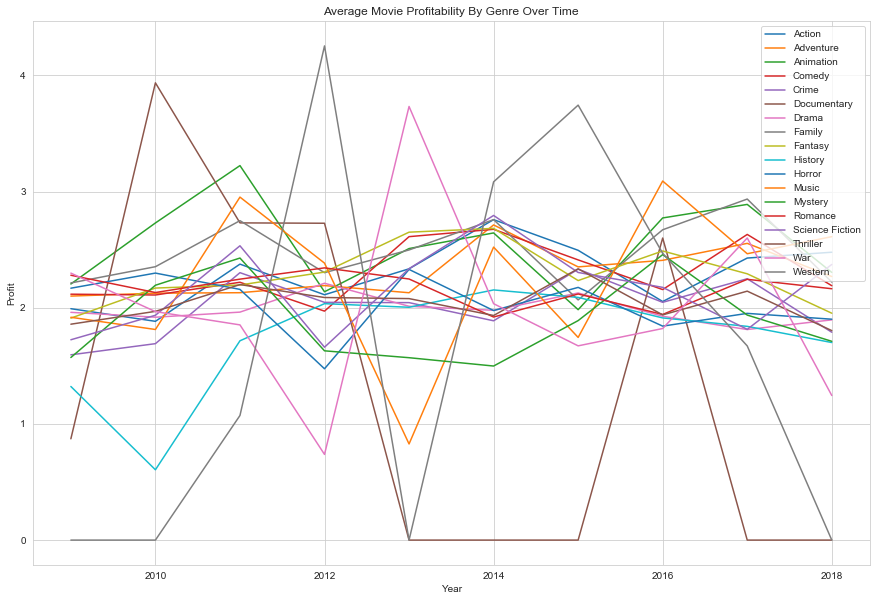

In [45]:
#Creates a plot of profitability averages by genre over the last ten years for all genres

fig, ax = plt.subplots(figsize=(15,10))
sns.set_style('whitegrid')
ax.legend(loc="upper right")

for plot_friendly_dict in plot_friendly_genres:
    
    ax.plot(plot_friendly_dict['year'], plot_friendly_dict['average'] , label=plot_friendly_dict['genre'])
    

ax.set_title("Average Movie Profitability By Genre Over Time")
ax.set_xlabel("Year")

ax.set_ylabel("Profit")
#ax.set_ylim(0,10)
ax.legend(loc=1)
plt.show()


In [46]:
#Tests the cumulative ten year avg for all genres and includes a count of all movies that qualify for each category
cumulative_genre_prof

[{'genre': 'Action', 'average': 2.2711403552443885, 'count': 393.0},
 {'genre': 'Adventure', 'average': 2.2999709232955854, 'count': 272.0},
 {'genre': 'Animation', 'average': 2.540936787657863, 'count': 99.0},
 {'genre': 'Comedy', 'average': 2.2838179851873868, 'count': 456.0},
 {'genre': 'Crime', 'average': 1.977088181905528, 'count': 187.0},
 {'genre': 'Documentary', 'average': 2.5992521116835334, 'count': 6.0},
 {'genre': 'Drama', 'average': 1.9840318138202866, 'count': 558.0},
 {'genre': 'Family', 'average': 2.467140673077258, 'count': 155.0},
 {'genre': 'Fantasy', 'average': 2.2878957781131803, 'count': 152.0},
 {'genre': 'History', 'average': 1.791542911943832, 'count': 61.0},
 {'genre': 'Horror', 'average': 2.0630209577633973, 'count': 100.0},
 {'genre': 'Music', 'average': 2.3325607767165097, 'count': 33.0},
 {'genre': 'Mystery', 'average': 1.9560248917214436, 'count': 110.0},
 {'genre': 'Romance', 'average': 2.170319183248302, 'count': 191.0},
 {'genre': 'Science Fiction', 'a

No handles with labels found to put in legend.


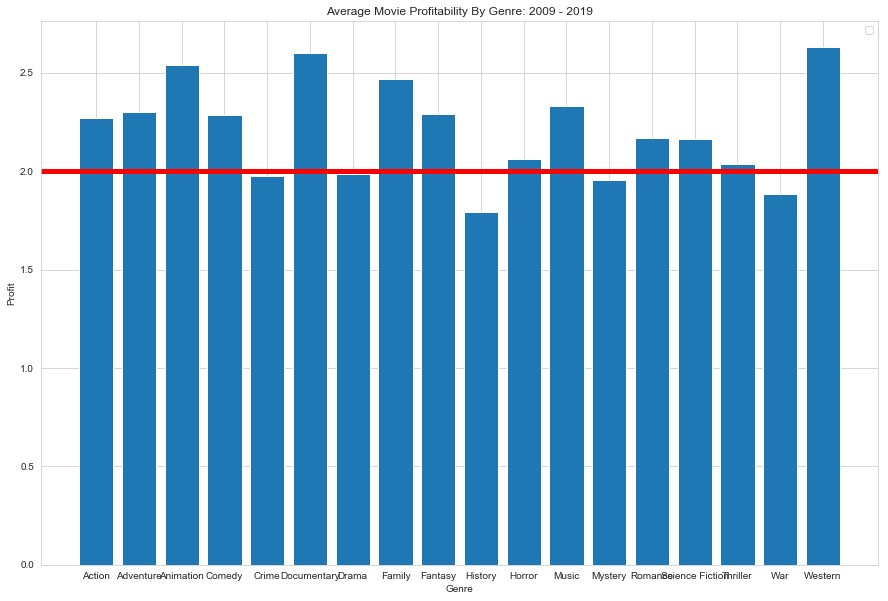

In [47]:
#Creates a ten year bar plot of the above information, 2x the budget is considered profitable because the split
#to movie theaters is not included in the budget

fig, ax2 = plt.subplots(figsize=(15,10))
sns.set_style('whitegrid')
ax2.legend(loc="upper right")

x_values = []
y_values = []
count_values = []

for c_genre_dict in cumulative_genre_prof:
    x_values.append(c_genre_dict['genre'])
    y_values.append(c_genre_dict['average'])
    count_values.append(c_genre_dict['count'])

ax2.bar(x_values, y_values, label=x_values)
ax2.axhline(y=2, color='r', lw = 5)

ax2.set_title("Average Movie Profitability By Genre: 2009 - 2019")
ax2.set_xlabel("Genre")
ax2.set_ylabel("Profit")
plt.show()